 # Minerando Dados - www.minerandodados.com.br

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


** Bibliotecas utilizadas **

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly
plotly.offline.init_notebook_mode()
import datetime

Output hidden; open in https://colab.research.google.com to view.

** Lendo o arquivo de dados e alterando o tipo data**

In [3]:
#petr4_1_2010_11_2017
dataset = pd.read_csv('/content/drive/My Drive/0. Business/2. Consultoria em Dados/2. IA, ML/0. Scripts, Exemplos, Cursos/Scripts exemplos/petr4_1_2010_11_2017.csv')

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [5]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2017-04-11,14.97,14.99,14.55,14.68,38392300
1,2017-04-10,14.90,14.94,14.70,14.94,37541700
2,2017-04-07,14.61,14.90,14.60,14.70,32944900
3,2017-04-06,14.62,14.87,14.42,14.53,34386000
4,2017-04-05,15.05,15.16,14.50,14.57,49623400


In [6]:
#variação entre o preco de abertura e fechamento
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Variation
0,2017-04-11,14.97,14.99,14.55,14.68,38392300,-0.29
1,2017-04-10,14.90,14.94,14.70,14.94,37541700,0.04
2,2017-04-07,14.61,14.90,14.60,14.70,32944900,0.09
3,2017-04-06,14.62,14.87,14.42,14.53,34386000,-0.09
4,2017-04-05,15.05,15.16,14.50,14.57,49623400,-0.48


In [8]:
dataset.describe()

,Open,High,Low,Close,Volume,Variation
count,1802.000000,1802.000000,1802.000000,1802.000000,1.802000e+03,1802.000000
mean,18.495744,18.764195,18.208746,18.465788,3.648545e+07,-0.029956
std,7.068140,7.101605,7.029314,7.058950,2.240024e+07,0.374095
min,4.200000,4.270000,4.120000,4.200000,2.820600e+06,-1.720000
25%,13.457500,13.770000,13.187500,13.502500,2.039270e+07,-0.250000
50%,18.550000,18.850000,18.275000,18.540000,2.989625e+07,-0.040000
75%,23.042500,23.300000,22.790000,22.997500,4.682575e+07,0.190000
max,37.380000,37.500000,37.070000,37.500000,2.136410e+08,1.390000


**Visualização de dados**

In [10]:
x1=dataset.Date
y1=dataset.Close
data = [go.Scatter(x=x1, y=y1)]
#data = [go.Scatter(x=dataset.Date, y=dataset.Close)]
layout = go.Layout(
    xaxis=dict(
        range=['01-01-2010','11-04-2017'],
        title='Ano'              
    ),
    yaxis=dict(
        range=[min(x1), max(y1)],
        title='Valor da Acao'
    ))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

**Preços de 7 dias atrás - Mostra Candlestick**

In [11]:
dataset2 = dataset.head(7)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

**Candles dos ultimos 6 meses..**

In [12]:
dataset2 = dataset.head(180)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

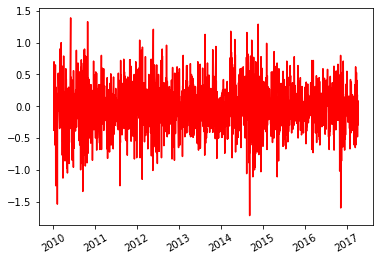

In [13]:
import matplotlib.dates as mdates
import datetime as dt
x = dataset['Date']
y = dataset['Variation']
plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)
plt.show()

**Correlação de Features e classe**

In [ ]:
treino = dataset

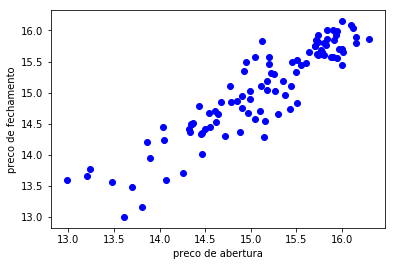

In [ ]:
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de abertura')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

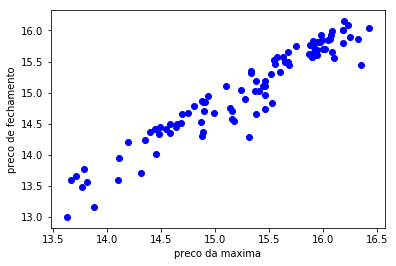

In [ ]:
x = treino.High[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco da maxima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

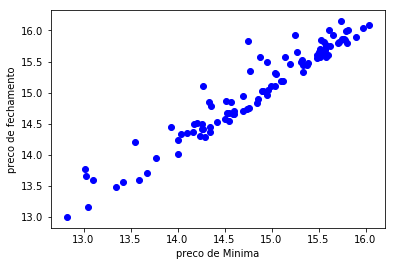

In [ ]:
x = treino.Low[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de Minima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

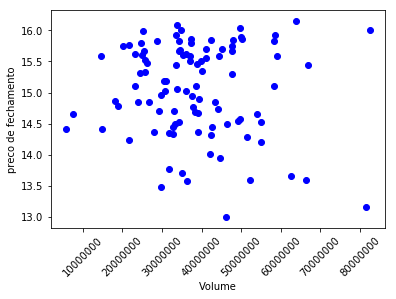

In [ ]:
x = treino.Volume[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

** Modelo **

In [ ]:
features = ['Open','High','Low','Volume']
treino = treino[features]

In [ ]:
treino.head()

,Open,High,Low,Volume
0,14.97,14.99,14.55,38392300
1,14.90,14.94,14.70,37541700
2,14.61,14.90,14.60,32944900
3,14.62,14.87,14.42,34386000
4,15.05,15.16,14.50,49623400


In [ ]:
y = dataset['Close']

** Fazendo Predições**

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino, y,random_state=42)

In [ ]:
X_treino.head()

,Open,High,Low,Volume
585,14.20,14.62,13.33,54167400
163,12.19,12.37,12.07,53317800
1593,27.35,27.64,27.21,32455000
1133,21.44,21.54,21.14,22808700
266,8.09,8.17,7.72,76508100


In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr_model.coef_

array([ -6.88569830e-01,   7.56540314e-01,   9.33134403e-01,
         7.75092990e-10])

In [ ]:
lr_model.predict(X_teste)[:10]

array([ 36.40282357,   6.69755743,  17.56221729,  12.37534074,
        23.61722772,  14.66679251,   9.58837485,  15.85914839,
        28.61967736,  18.67014872])

**Comparando os resultados - Dados da tabela**

In [ ]:
y_teste[:10]

1791    36.55
322      6.79
1033    17.74
162     12.49
1273    23.88
70      14.78
247      9.69
736     16.03
1518    28.71
1006    18.53
Name: Close, dtype: float64

In [ ]:
lr_model.predict(X_teste)[:10]

array([ 36.40282357,   6.69755743,  17.56221729,  12.37534074,
        23.61722772,  14.66679251,   9.58837485,  15.85914839,
        28.61967736,  18.67014872])

**Validando o modelo**

In [ ]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

0.15640353106989169

** Da pra melhorar o modelo?**

**Teste com Open e High **

In [ ]:
lr_model2 = LinearRegression()

In [ ]:
features = ['Open','High']
treino2 = treino[features]

In [ ]:
treino2.head()

,Open,High
0,14.97,14.99
1,14.90,14.94
2,14.61,14.90
3,14.62,14.87
4,15.05,15.16


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino2, y, test_size=0.33, random_state=42)

In [ ]:
lr_model2.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr_model2.coef_

array([-0.15946514,  1.15146638])

In [ ]:
RMSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))**0.5
RMSE

0.24664647643084298

**Confira o artigo na integra em: www.minerandodados.com.br**